## Problem Statement
It happens all the time: someone gives you data containing malformed strings,Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN','londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. Air France', '"Swiss Air"']})

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
'From_To': ['LoNDon_paris', 'MAdrid_miLAN','londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. Air France', '"Swiss Air"']
})

print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   From_To       5 non-null      object 
 1   FlightNumber  3 non-null      float64
 2   RecentDelays  5 non-null      object 
 3   Airline       5 non-null      object 
dtypes: float64(1), object(3)
memory usage: 288.0+ bytes
None


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


#### 1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [2]:
df['FlightNumber'] = df['FlightNumber'].interpolate()
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   From_To       5 non-null      object 
 1   FlightNumber  5 non-null      float64
 2   RecentDelays  5 non-null      object 
 3   Airline       5 non-null      object 
dtypes: float64(1), object(3)
memory usage: 288.0+ bytes
None


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [3]:
df['FlightNumber'] = df['FlightNumber'].astype(dtype = int)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   From_To       5 non-null      object
 1   FlightNumber  5 non-null      int32 
 2   RecentDelays  5 non-null      object
 3   Airline       5 non-null      object
dtypes: int32(1), object(3)
memory usage: 268.0+ bytes
None


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


#### 2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.
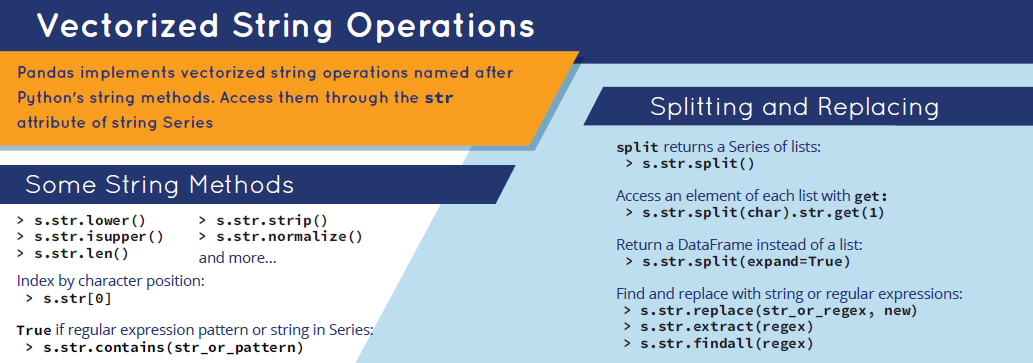

In [4]:
Temp = df['From_To'].str.split('_', expand=True)
Temp

,0,1
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [5]:
df['Flight_From'] = Temp[0]
df['Flight_To'] = Temp[1]
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   From_To       5 non-null      object
 1   FlightNumber  5 non-null      int32 
 2   RecentDelays  5 non-null      object
 3   Airline       5 non-null      object
 4   Flight_From   5 non-null      object
 5   Flight_To     5 non-null      object
dtypes: int32(1), object(5)
memory usage: 348.0+ bytes
None


,From_To,FlightNumber,RecentDelays,Airline,Flight_From,Flight_To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10055,[],<Air France> (12),MAdrid,miLAN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


#### 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [6]:
df['Flight_From'] = df['Flight_From'].str.capitalize()
df['Flight_To']   = df['Flight_To'].str.capitalize()
df

,From_To,FlightNumber,RecentDelays,Airline,Flight_From,Flight_To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),London,Paris
1,MAdrid_miLAN,10055,[],<Air France> (12),Madrid,Milan
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,Paris
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,London


#### 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [7]:
df.drop(columns = ['From_To'], inplace = True)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FlightNumber  5 non-null      int32 
 1   RecentDelays  5 non-null      object
 2   Airline       5 non-null      object
 3   Flight_From   5 non-null      object
 4   Flight_To     5 non-null      object
dtypes: int32(1), object(4)
memory usage: 308.0+ bytes
None


,FlightNumber,RecentDelays,Airline,Flight_From,Flight_To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


#### 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN. Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in dfwith delays.


In [8]:
delays = df['RecentDelays'].apply(pd.Series)
rows_n, columns_n = delays.shape
delays

,0,1,2
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [9]:
for i in range(columns_n):
    tmp_str = 'delay_' + str(i)
    df[tmp_str] = delays[i]

In [10]:
df.drop(columns = ['RecentDelays'], inplace = True)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  5 non-null      int32  
 1   Airline       5 non-null      object 
 2   Flight_From   5 non-null      object 
 3   Flight_To     5 non-null      object 
 4   delay_0       4 non-null      float64
 5   delay_1       3 non-null      float64
 6   delay_2       1 non-null      float64
dtypes: float64(3), int32(1), object(3)
memory usage: 388.0+ bytes
None


,FlightNumber,Airline,Flight_From,Flight_To,delay_0,delay_1,delay_2
0,10045,KLM(!),London,Paris,23.0,47.0,NaN
1,10055,<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10065,(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,"""Swiss Air""",Brussels,London,67.0,32.0,NaN


#### 6. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. '(British Airways. )' should become 'British Airways'.

In [11]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False)
df

,FlightNumber,Airline,Flight_From,Flight_To,delay_0,delay_1,delay_2
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


In [12]:
df['Airline'] = df['Airline'].str.strip()
df

,FlightNumber,Airline,Flight_From,Flight_To,delay_0,delay_1,delay_2
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN
